<a href="https://colab.research.google.com/github/rafavidal1709/registroasav/blob/main/Proje%C3%A7%C3%A3o_e_An%C3%A1lise_Visual_do_Conhecimento_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# O dataset o os metadados

O dataset está disponível no Kaggle:

https://www.kaggle.com/datasets/spacex/spacex-missions

In [1]:
import pandas as pd

df = pd.read_csv("/content/database.csv")
df.head()

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


In [14]:
import json

# Abrir arquivo com metadados
metadata_path = '/content/spacex-missions-metadata.json'
with open(metadata_path, 'r') as f:
    metadata = json.load(f)

# Imprimir meta dados
metadata_cleaned = {
    "Name": metadata.get("name"),
    "Description": metadata.get("description"),
    "Source": metadata.get("publisher", {}).get("name"),
    "Last Modified": metadata.get("dateModified"),
    "License": metadata.get("license", {}).get("name"),
    "Fields": [field["name"] for field in metadata["recordSet"][0]["field"]],
    "Distribution Files": [dist["name"] for dist in metadata["distribution"]],
}

metadata_cleaned


{'Name': 'SpaceX Missions, 2006-Present',
 'Description': '# Context \n\nSpaceX has gained worldwide attention for a series of historic milestones. It is the only private company ever to return a spacecraft from low-Earth orbit, which it first accomplished in December 2010. The company made history again in May 2012 when its Dragon spacecraft attached to the International Space Station, exchanged cargo payloads, and returned safely to Earth — a technically challenging feat previously accomplished only by governments. Since then Dragon has delivered cargo to and from the space station multiple times, providing regular cargo resupply missions for NASA.\n\nUnder a $1.6 billion contract with NASA, SpaceX is flying numerous cargo resupply missions to the International Space Station, for a total of at least 20 flights under the Commercial Resupply Services contract. In 2016, NASA awarded SpaceX a second version of that contract that will cover a minimum of 6 additional flights from 2019 onwa

# Análise exploratória dos dados

In [17]:
# Verificar o tamanho do dataset e os tipos de dados
df.info()

# Verificar a presença de valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Flight Number      41 non-null     object        
 1   Launch Date        41 non-null     datetime64[ns]
 2   Launch Time        41 non-null     object        
 3   Launch Site        41 non-null     object        
 4   Vehicle Type       41 non-null     object        
 5   Payload Name       41 non-null     object        
 6   Payload Type       38 non-null     object        
 7   Payload Mass (kg)  33 non-null     float64       
 8   Payload Orbit      36 non-null     object        
 9   Customer Name      39 non-null     object        
 10  Customer Type      39 non-null     object        
 11  Customer Country   39 non-null     object        
 12  Mission Outcome    41 non-null     object        
 13  Failure Reason     8 non-null      object        
 14  Landing Type

,0
Flight Number,0
Launch Date,0
Launch Time,0
Launch Site,0
Vehicle Type,0
Payload Name,0
Payload Type,3
Payload Mass (kg),8
Payload Orbit,5
Customer Name,2


Podemos analisar a correlação entre variáveis como massa da carga útil e tipos de órbita, ou a relação entre o resultado das missões e os tipos de veículos.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


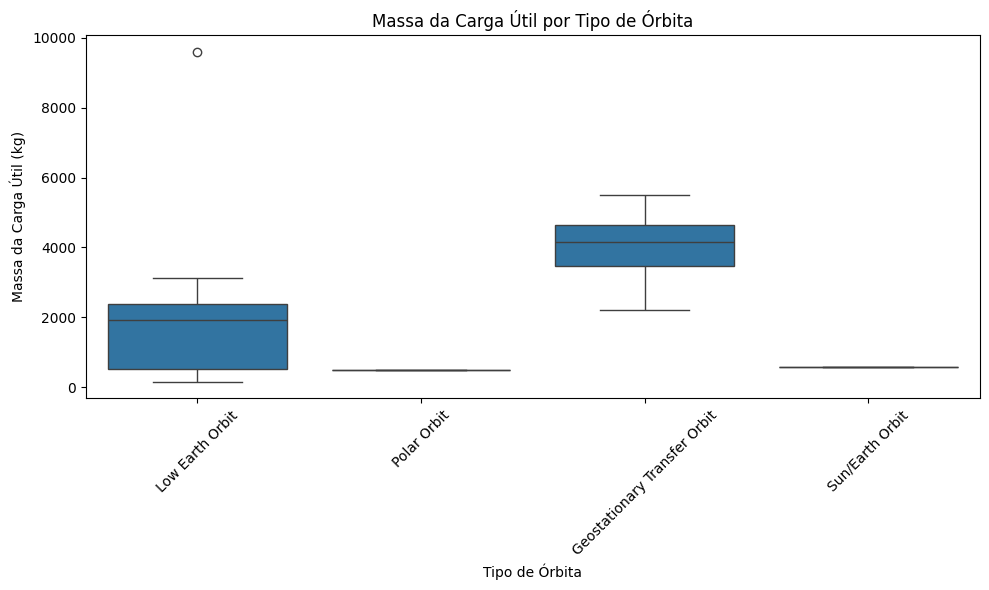

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


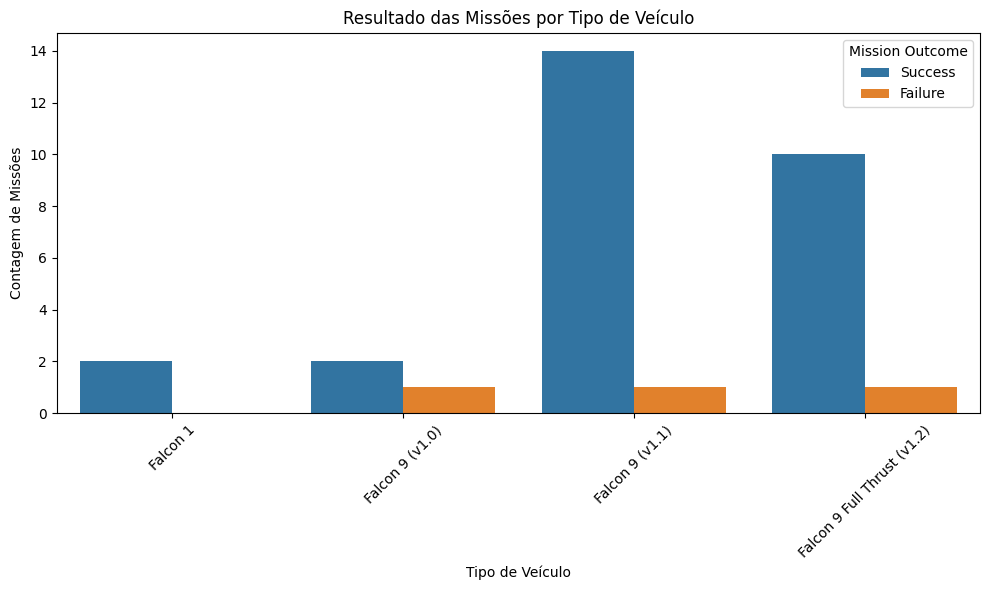

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limpar dados removendo valores nulos
df_cleaned = df.dropna(subset=['Payload Mass (kg)', 'Payload Orbit', 'Mission Outcome', 'Vehicle Type'])

# Plotando a relação entre a massa da carga útil e o tipo de órbita
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payload Orbit', y='Payload Mass (kg)', data=df_cleaned)
plt.title('Massa da Carga Útil por Tipo de Órbita')
plt.xlabel('Tipo de Órbita')
plt.ylabel('Massa da Carga Útil (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotando a relação entre o resultado da missão e o tipo de veículo
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle Type', hue='Mission Outcome', data=df_cleaned)
plt.title('Resultado das Missões por Tipo de Veículo')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Contagem de Missões')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Agora que entendemos os tipos de dados, calculamos a quantidade de valores nulos do dataset como um todo e analisamos algumas correlações entre variáveis; vamos focar nos lançamentos agrupados por ano, o que será útil para a previsão que iremos executar.

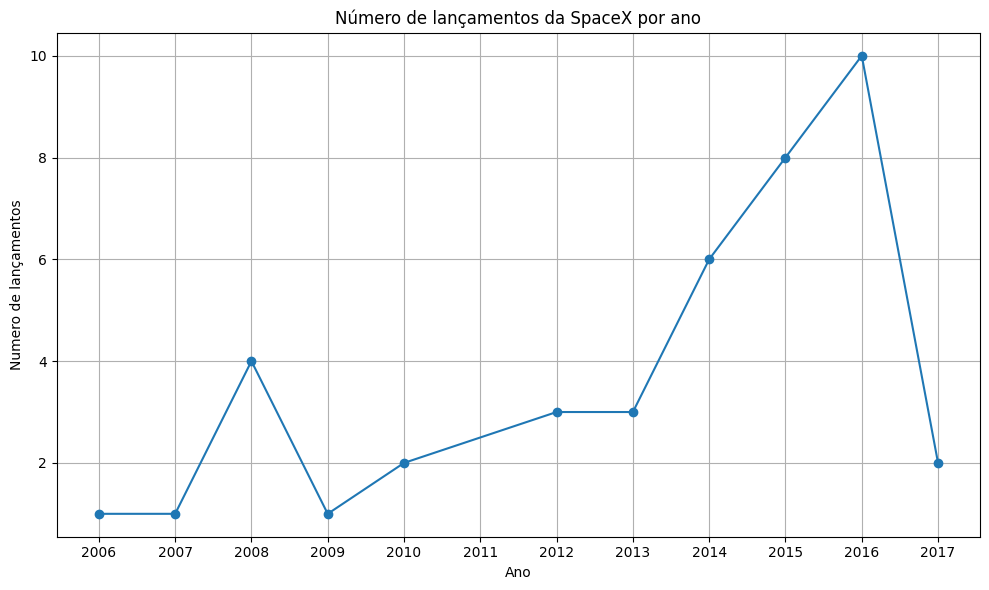

In [4]:
import matplotlib.pyplot as plt

# Formatando e limpando os dados
df['Launch Date'] = pd.to_datetime(df['Launch Date'], errors='coerce')
df.dropna(subset=['Launch Date'], inplace=True)

# Agrupando os dados por ano
df['Launch Year'] = df['Launch Date'].dt.year
launches_per_year = df.groupby('Launch Year').size()

# Plotting the time series of launches per year
plt.figure(figsize=(10, 6))
launches_per_year.plot(kind='line', marker='o')
plt.title('Número de lançamentos da SpaceX por ano')
plt.xlabel('Ano')
plt.ylabel('Numero de lançamentos')
plt.xticks(ticks=range(launches_per_year.index.min(), launches_per_year.index.max() + 1), labels=range(launches_per_year.index.min(), launches_per_year.index.max() + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

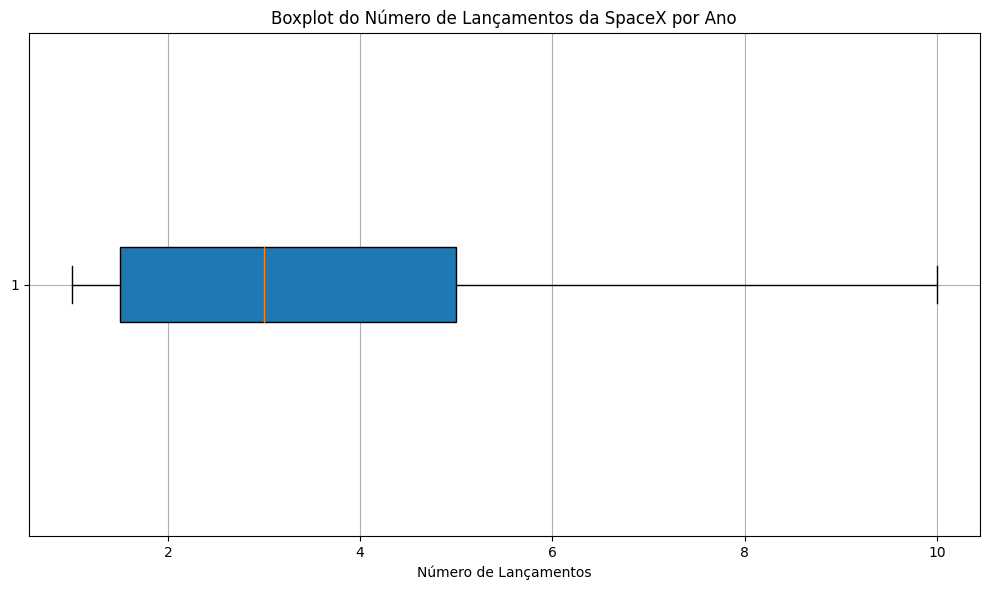

Mínimo: 1
Máximo: 10
Média: 3.73
1º Quartil (Q1 - 25%): 1.5
Mediana: 3.0
3º Quartil (Q3 - 75%): 5.0
Moda: 1
Desvio Padrão: 3.04


In [21]:
# Criando um boxplot dos lançamentos por ano
plt.figure(figsize=(10, 6))

# Convertendo os dados em formato adequado para o boxplot
launches_per_year_df = launches_per_year.reset_index()
launches_per_year_df.columns = ['Launch Year', 'Launch Count']

# Plotando o boxplot
plt.boxplot(launches_per_year_df['Launch Count'], vert=False, patch_artist=True)
plt.title('Boxplot do Número de Lançamentos da SpaceX por Ano')
plt.xlabel('Número de Lançamentos')
plt.grid(True)
plt.tight_layout()

# Mostrando o gráfico
plt.show()

# Calculando as estatísticas descritivas
min_value = launches_per_year_df['Launch Count'].min()
max_value = launches_per_year_df['Launch Count'].max()
mean_value = launches_per_year_df['Launch Count'].mean()
median_value = launches_per_year_df['Launch Count'].median()
quartiles = launches_per_year_df['Launch Count'].quantile([0.25, 0.5, 0.75])
mode_value = launches_per_year_df['Launch Count'].mode().values[0]
std_dev = launches_per_year_df['Launch Count'].std()

# Exibindo as estatísticas descritivas
print(f"Mínimo: {min_value}")
print(f"Máximo: {max_value}")
print(f"Média: {mean_value:.2f}")
print(f"1º Quartil (Q1 - 25%): {quartiles[0.25]}")
print(f"Mediana: {median_value}")
print(f"3º Quartil (Q3 - 75%): {quartiles[0.75]}")
print(f"Moda: {mode_value}")
print(f"Desvio Padrão: {std_dev:.2f}")


# Prevendo o lançamento para 2023

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


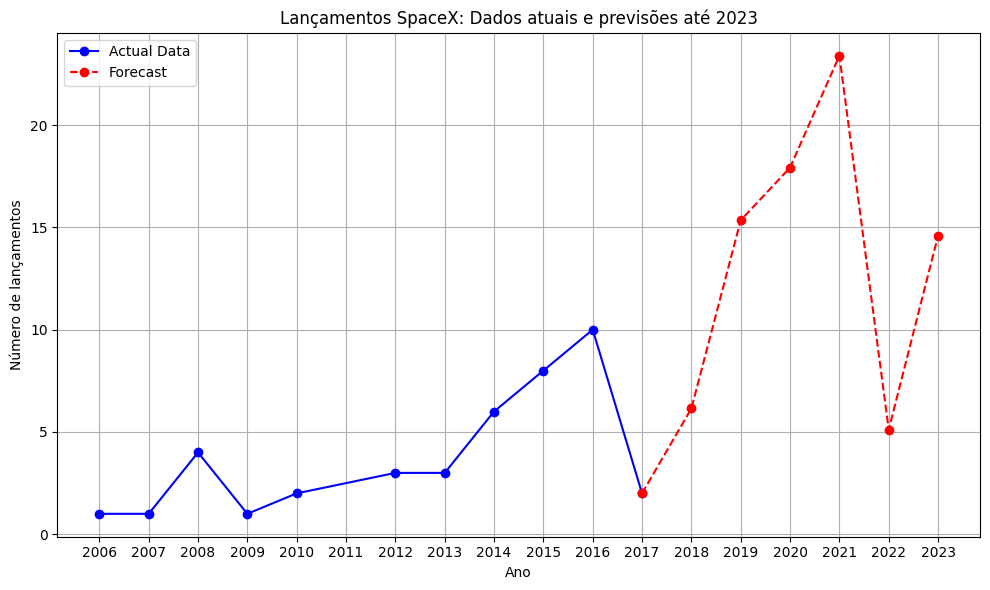

In [24]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Treinando o modelo do ExponentialSmoothing para predizer os próximos anos
model = ExponentialSmoothing(launches_per_year, trend='mul', seasonal='mul', seasonal_periods=5)
hw_model = model.fit()

"""
Essa configuração utiliza o modelo Holt-Winters com uma tendência multiplicativa (trend='mul'), o que significa que a série temporal
apresenta crescimento ou decrescimento exponencial ao longo do tempo. A sazonalidade também é multiplicativa (seasonal='mul'),
indicando que os padrões sazonais aumentam ou diminuem proporcionalmente aos dados, e o parâmetro seasonal_periods=5 define que a
sazonalidade tem um ciclo de 5 períodos, ou seja, espera-se que haja um padrão recorrente a cada 5 unidades de tempo (por exemplo,
anos, meses, etc.).

Não há uma sequência temporal longa o bastante para afirmar que a sazonalidade existe e que o período em que ela ocorre está correto,
porém para fins de demonstração da projeção dos dados escolhemos os valores que melhor se encaixam nos poucos dados que temos.
"""

# Fazendo a previsão para os próximos 6 anos
forecast = hw_model.forecast(steps=6)
full_series = pd.concat([launches_per_year, pd.Series(forecast.values, index=range(2018, 2024))])

plt.figure(figsize=(10, 6))

# Dados atuais
plt.plot(full_series[:launches_per_year.shape[0]].index, full_series[:launches_per_year.shape[0]], 'bo-', label='Actual Data')

# Dados previstos
plt.plot(full_series[launches_per_year.shape[0]-1:].index, full_series[launches_per_year.shape[0]-1:], 'r--o', label='Forecast')

plt.title('Lançamentos SpaceX: Dados atuais e previsões até 2023')
plt.xlabel('Ano')
plt.ylabel('Número de lançamentos')
plt.xticks(ticks=range(full_series.index.min(), full_series.index.max() + 1), labels=range(full_series.index.min(), full_series.index.max() + 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

O **Exponential Smoothing** (Suavização Exponencial), e mais especificamente o modelo **Holt-Winters**, é uma técnica usada para modelar e prever séries temporais que apresentam **aleatoriedade**, **tendência**, e **sazonalidade**. Ele combina três componentes principais:

### 1. **Aleatoriedade**:
   - **Aleatoriedade** refere-se à variabilidade nos dados que não pode ser explicada por tendências ou sazonalidade. O modelo de suavização exponencial lida com a aleatoriedade suavizando as flutuações imprevisíveis nos dados. A suavização é feita através da ponderação decrescente de observações passadas, de modo que as observações mais recentes têm maior peso.
   - No caso específico do código, a aleatoriedade é tratada implicitamente no processo de suavização, de forma que o modelo se adapta ao comportamento dos lançamentos da SpaceX ao longo do tempo, filtrando variações aleatórias.

### 2. **Tendência**:
   - **Tendência** é o comportamento de longo prazo dos dados, indicando se a série temporal está aumentando ou diminuindo ao longo do tempo. No modelo Holt-Winters, a tendência pode ser modelada de forma **aditiva** (crescimento linear) ou **multiplicativa** (crescimento exponencial).
   - No exemplo: `trend='mul'`, o modelo assume uma tendência **multiplicativa**, ou seja, o crescimento no número de lançamentos da SpaceX ao longo dos anos segue um padrão de crescimento exponencial. Isso significa que a quantidade de lançamentos não cresce de forma constante, mas sim de maneira proporcional ao valor atual, sugerindo que os lançamentos aumentam em uma taxa proporcional ao histórico.

### 3. **Sazonalidade**:
   - **Sazonalidade** refere-se a padrões que se repetem em intervalos regulares dentro da série temporal. A sazonalidade também pode ser **aditiva** (a variação sazonal é constante) ou **multiplicativa** (a variação sazonal aumenta ou diminui proporcionalmente aos dados).
   - No caso específico: `seasonal='mul'` e `seasonal_periods=5`, o modelo assume que a sazonalidade também é multiplicativa, ou seja, as flutuações sazonais crescem ou diminuem proporcionalmente ao valor da série temporal. O parâmetro `seasonal_periods=5` indica que o ciclo sazonal se repete a cada 5 períodos (possivelmente anos). Isso implica que há um padrão recorrente de variações nos lançamentos da SpaceX a cada 5 anos, onde o número de lançamentos aumenta ou diminui de forma proporcional a esse ciclo.

### Aplicação no Caso Específico:
O modelo está sendo aplicado para prever o número de lançamentos futuros da SpaceX com base no histórico de lançamentos. Ao configurar o modelo com uma **tendência multiplicativa** e uma **sazonalidade multiplicativa**, o modelo prevê que tanto o crescimento geral dos lançamentos quanto as flutuações sazonais crescem proporcionalmente ao número de lançamentos anteriores. O uso de `seasonal_periods=5` sugere que o padrão sazonal observado ocorre a cada 5 anos, o que pode ser uma escolha com base no ciclo dos dados históricos.

Esse modelo é útil para capturar a dinâmica da SpaceX, onde o número de lançamentos tem aumentado significativamente ao longo dos anos, e pode haver variações periódicas nos lançamentos (por exemplo, com base em contratos ou eventos externos que afetam a empresa).